{'a-audio-feature': 20135, 'a-gyroscope': 1893, 'a-wifi': 164, 'a-gravity': 566, 'a-magneticfield': 539, 'a-accelerometeruncalibrated': 1638, 'a-gyroscopeuncalibrated': 1854, 'a-magneticfielduncalibrated': 527, 'a-proximity': 494, 'a-stepcounter': 587, 'a-orientation': 403, 'a-rotationvector': 528, 'a-linearacceleration': 540, 'a-light': 492, 'a-geomagneticrotationvector': 545, 'a-accelerometer': 2294, 'a-pressure': 397, 'a-tiltsensor': 200, 'a-gamerotationvector': 560, 'a-stepdetector': 476, 'a-sms': 48, 'a-gps': 164, 'a-survey': 75, 'i-audio-feature': 950, 'i-accelerometer': 70, 'i-gyroscope': 72, 'i-magnetometer': 64, 'i-batterystate': 38, 'i-compass': 46, 'i-historicalactivitydata': 22, 'i-altitude': 41, 'i-accessibility': 22, 'i-pedometer': 14, 'i-location': 17, 'i-survey-daily': 75, 'a-bluetooth': 41}


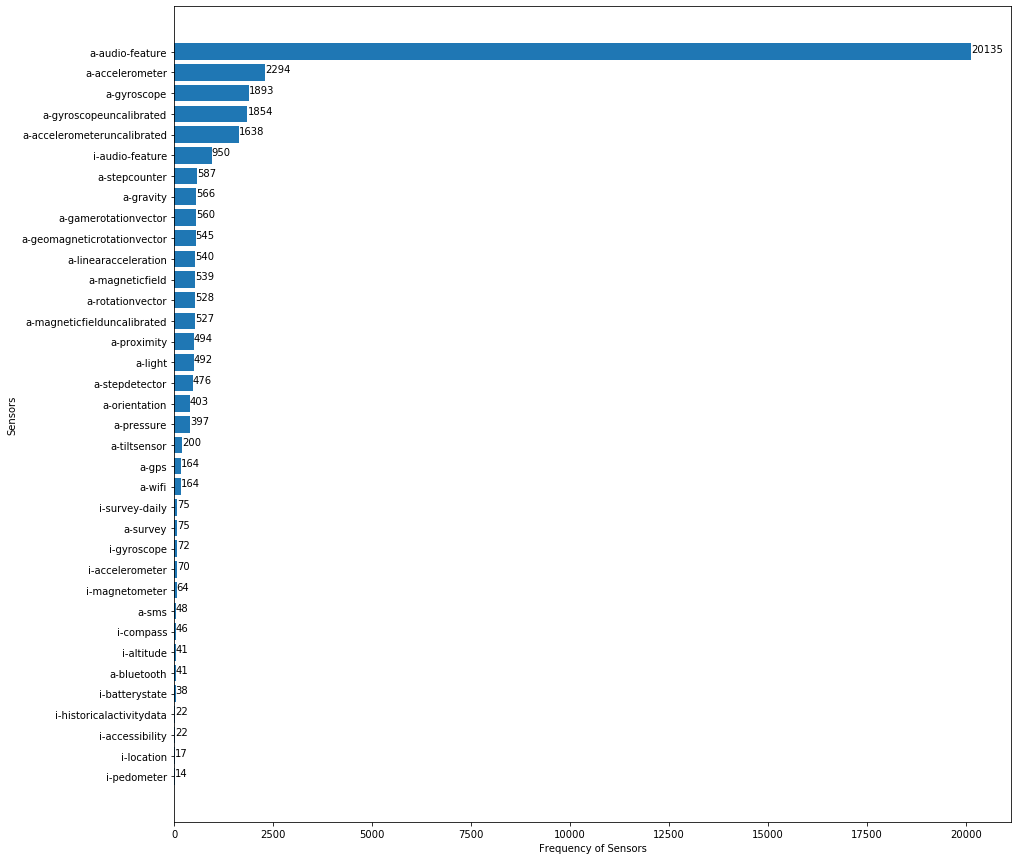

In [21]:
import os
import json 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

frequencySensorMap = {}
dailyMood = {} 

# Good Actors
path = ('/data/datasets/CRA/good_actors_Mar6_2022')
for root, dirs, files in os.walk(path, topdown=False):
   for filename in files:
      if filename[-4:] == 'json':
        #Read json contents
        try:
          f = open("".join([root,"/",filename]),"r")
          data = json.load(f)
        except:
          print("An error occured while opening the file")
          break
        
        #Grabbing Sensor type and adding it into distribution
        sensorName = data['type'].replace("kry-sensor-","")
        if sensorName not in frequencySensorMap:
            frequencySensorMap[sensorName] = 0
        frequencySensorMap[sensorName] += 1
        
        f.close()

#Bad Actors
path = ('/data/datasets/CRA/bad_actors_Mar6_2022')
for root, dirs, files in os.walk(path, topdown=False):
   for filename in files:
      if filename[-4:] == 'json':
        #Read json contents
        try:
          f = open("".join([root,"/",filename]),"r")
          data = json.load(f)
        except:
          print("An error occured while opening the file")
        
        #Grabbing Sensor type and adding it into distribution
        sensorName = data['type'].replace("kry-sensor-","")
        if sensorName not in frequencySensorMap:
            frequencySensorMap[sensorName] = 0
        frequencySensorMap[sensorName] += 1
        f.close()

print(frequencySensorMap)

df = pd.DataFrame({'Type':list(frequencySensorMap.keys()),'Freq':list(frequencySensorMap.values())})
df_sorted = df.sort_values('Freq',ascending = True)
plt.figure(figsize=(15,15))
x = list(frequencySensorMap.keys())
y = list(frequencySensorMap.values())
for key in frequencySensorMap:
    plt.annotate(str(frequencySensorMap[key]), (frequencySensorMap[key],key))
plt.barh('Type','Freq', data = df_sorted)
plt.xlabel("Frequency of Sensors")
plt.ylabel("Sensors")
plt.show()

**Different Survey Distributions**